In [1]:
!pip3 install --user matplotlib numpy


You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import numpy as np
from matplotlib import pyplot as plt 
import os
from pathlib import Path
import json

In [2]:
%config InlineBackend.figure_format = 'retina'

In [4]:
data = {}

def walk_outputs(max_files=10):
    count = 0
    for file in os.listdir("output"):
        if "." in file:
            continue
        
        if count > max_files:
            break
        filename = "output/{}/{}.json".format(file, file)
        if Path(filename).is_file():
            file = file.split('.')[0]
            count += 1
            yield file, filename 

In [5]:
for name, file in walk_outputs(10000):
    with open(file, 'r') as json_file:
        this_data = json.load(json_file)
        data[name] = this_data

In [74]:
dofs = np.array([d['degrees_of_freedom'] for d in data.values()])

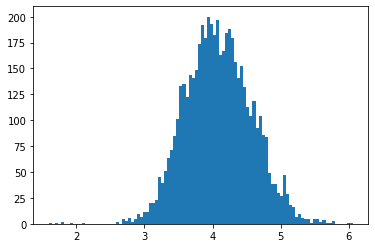

In [82]:
plt.hist(np.log10(dofs), bins=100);

In [9]:
keys = np.array(sorted([k for k in data.keys()]))

In [43]:
data[keys[123]]

{'problem': '101331',
 'matrices': [{'name': 'velocity_A',
   'nnz': 9311220,
   'shape': [127710, 127710],
   'sparsity_percent': 0.057089570831642705},
  {'name': 'velocity_b',
   'nnz': 65646,
   'shape': [1, 127710],
   'sparsity_percent': 51.40239605355884},
  {'name': 'pressure_A',
   'nnz': 78361,
   'shape': [6779, 6779],
   'sparsity_percent': 0.17051739989699888},
  {'name': 'pressure_b',
   'nnz': 3353,
   'shape': [1, 6779],
   'sparsity_percent': 49.461572503319076},
  {'name': 'velocity_correction_A',
   'nnz': 9311220,
   'shape': [127710, 127710],
   'sparsity_percent': 0.057089570831642705},
  {'name': 'velocity_correction_b',
   'nnz': 65646,
   'shape': [1, 127710],
   'sparsity_percent': 51.40239605355884}],
 'degrees_of_freedom': 20337}

In [11]:
velocity_A_shapes = []
velocity_A_sparisities = []
def velAs():
    for k in keys:
        d = data[k]['matrices']
        for m in d:
            if m['name'] == 'velocity_A': 
                yield m
            
for m in velAs():
    velocity_A_shapes.append(m['shape'][0])
    velocity_A_sparisities.append(m['sparsity_percent'])
    
velocity_A_shapes = np.array(velocity_A_shapes)
velocity_A_sparisities = np.array(velocity_A_sparisities)

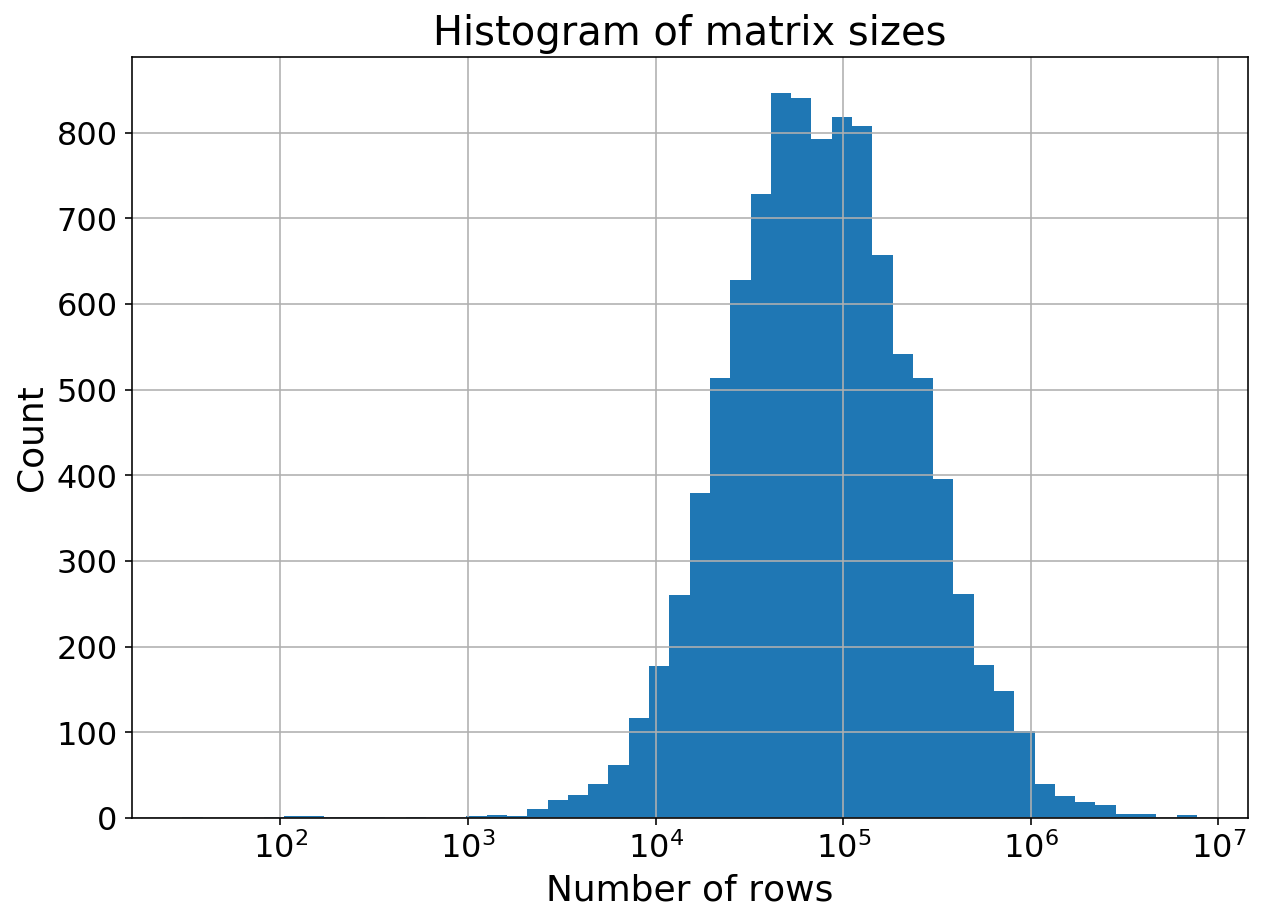

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
n, bins, patches = ax.hist(np.log10(velocity_A_shapes), 50)

def format_func(x, tick_number):
    return r"$10^{:d}$".format(int(np.round(x)), 5) if x != 0 else ""

ax.set_xlabel('Number of rows', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Histogram of matrix sizes', fontsize=20)
ax.grid(True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.tick_params(axis='x', labelsize=16 )
ax.tick_params(axis='y', labelsize=16 )

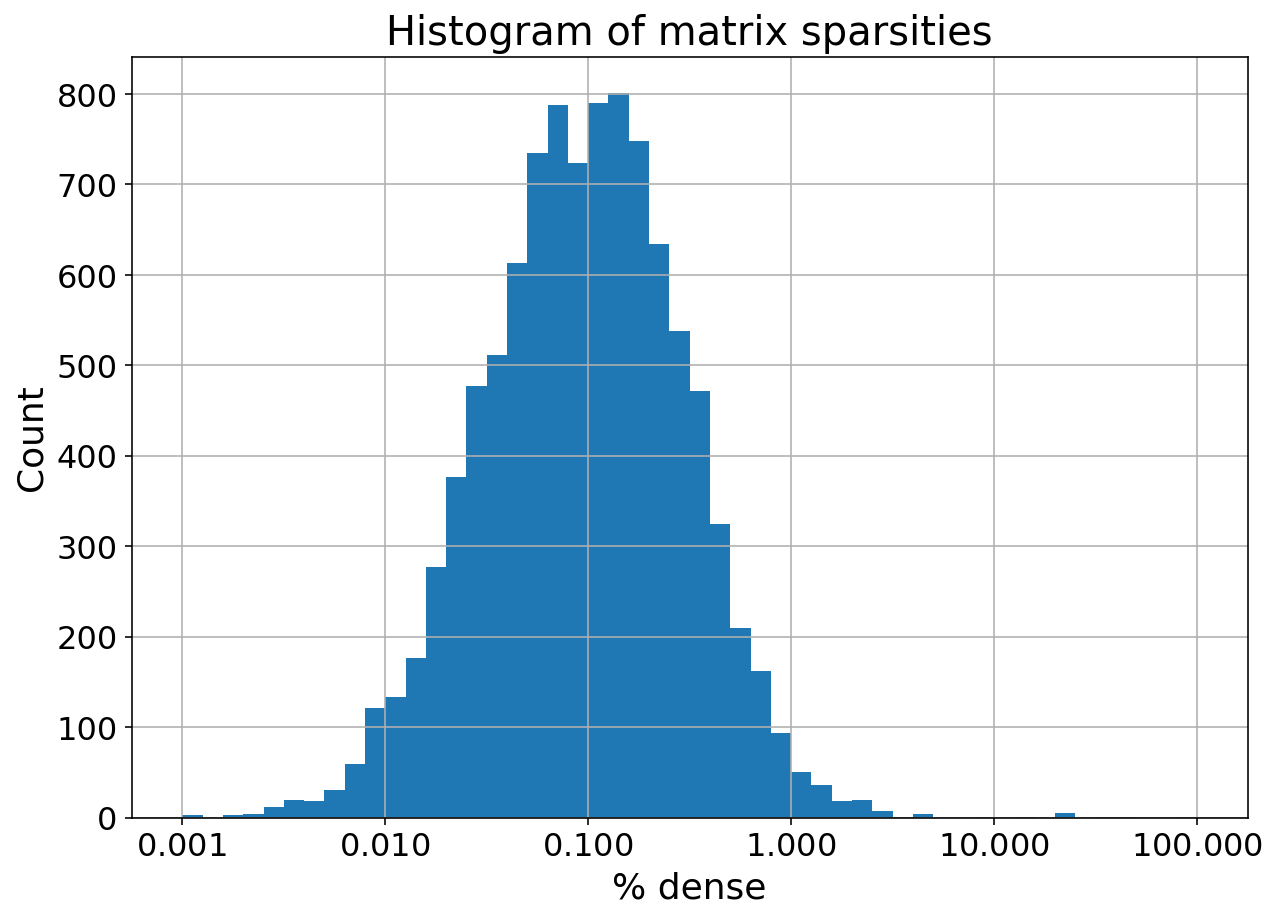

In [44]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
n, bins, patches = ax.hist(np.log10(velocity_A_sparisities), 50)

def format_func(x, tick_number):
    return r"${:.3f}$".format(10**x) 

ax.set_xlabel('% dense', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Histogram of matrix sparsities', fontsize=20)
ax.grid(True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.tick_params(axis='x', labelsize=16 )
ax.tick_params(axis='y', labelsize=16 )


In [9]:
np.argmin([d['degrees_of_freedom'] for d in data.values()])

4069

In [12]:
[d for d in data.keys()][4069]

'82541'

In [24]:
data['129871']

{'problem': '129871',
 'matrices': [{'name': 'velocity_A',
   'nnz': 2952,
   'shape': [84, 84],
   'sparsity_percent': 41.83673469387755},
  {'name': 'velocity_b', 'nnz': 0, 'shape': [1, 84], 'sparsity_percent': 0.0},
  {'name': 'pressure_A',
   'nnz': 46,
   'shape': [10, 10],
   'sparsity_percent': 46.0},
  {'name': 'pressure_b', 'nnz': 0, 'shape': [1, 10], 'sparsity_percent': 0.0},
  {'name': 'velocity_correction_A',
   'nnz': 2952,
   'shape': [84, 84],
   'sparsity_percent': 41.83673469387755},
  {'name': 'velocity_correction_b',
   'nnz': 0,
   'shape': [1, 84],
   'sparsity_percent': 0.0}],
 'degrees_of_freedom': 30}

In [27]:
l = []
for k,v in data.items():
    if v['degrees_of_freedom'] < 1000:
        l.append(k)
print(l)

['63447', '47733', '63055', '73336', '201962', '83715', '53432', '780079', '471983', '99276', '741527', '215386', '42042', '64579', '61462', '76202', '471985', '70380', '61464', '89527', '168077', '91454', '92834', '471986', '138203', '74157', '98925', '41929', '130980', '165847', '79187', '138207', '239180', '1017018', '1716284', '237735', '1207662', '100643', '815477', '200683', '82541', '70375', '188018', '93554', '70379', '63452', '128915', '726664', '187996', '109375', '139934', '375268', '39893', '73335', '72582', '84943', '93549', '93553', '1004827', '129871', '1344039', '105803', '97156', '68730', '216762', '70378', '205448', '464843', '93551', '82063', '1344053', '71764', '125071', '39635', '93556', '1716285', '129867', '59703', '214480', '168075', '1505031', '471984', '39637', '94192', '100026', '472166', '53427', '95794', '741531', '61458', '64983', '200684', '96456', '39246', '102041', '113001', '97172', '126286', '137977', '1344057', '1344043', '54622', '1439537', '98797',